Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Load and Explore the Dataset

In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Preview
print("Shape:", df.shape)
df.head()

Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA (Exploratory Data Analysis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


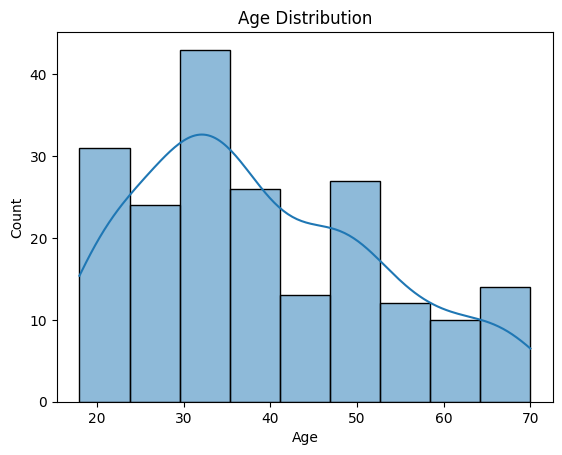

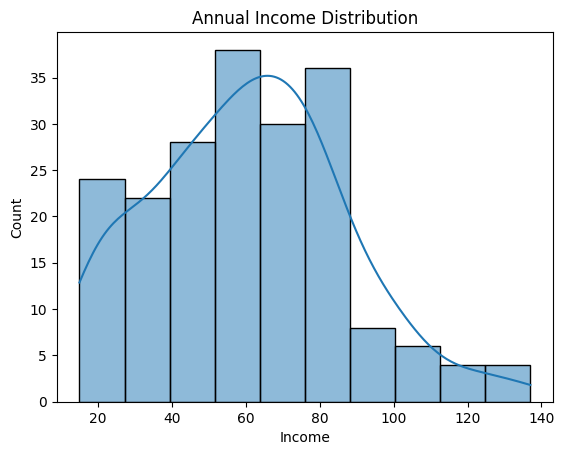

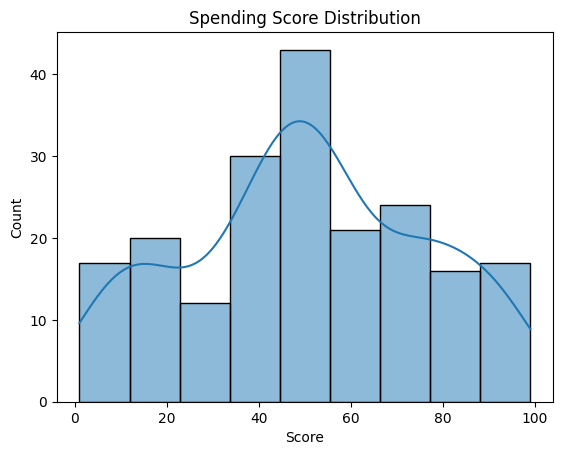

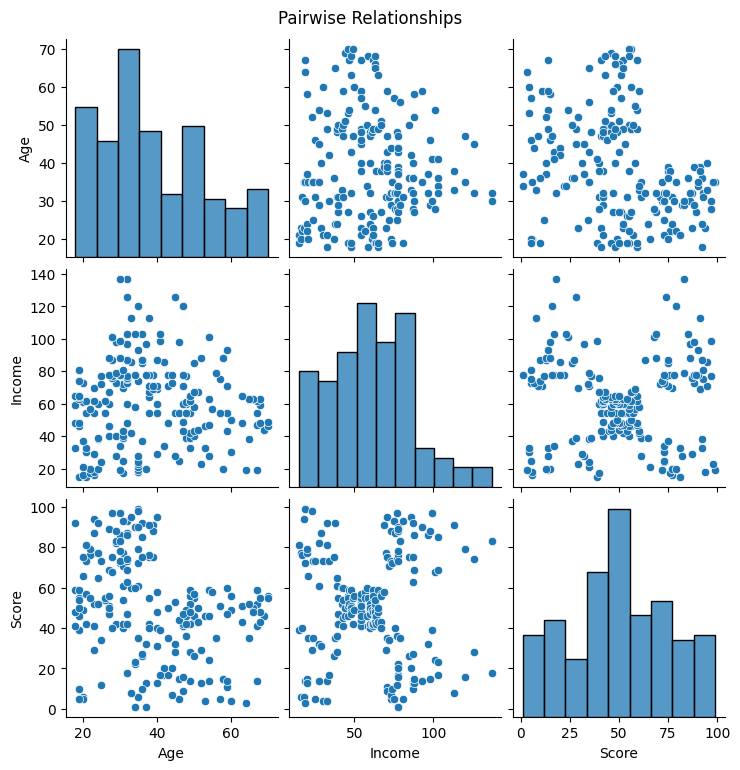

In [3]:
# Data types and missing values
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Rename columns for consistency
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

# Distribution plots
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Income'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(df['Score'], kde=True)
plt.title("Spending Score Distribution")
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'Income', 'Score']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

Select & Scale Features

In [4]:
# Select relevant features
features = df[['Age', 'Income', 'Score']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Find Optimal K (Elbow Method & Silhouette Score)

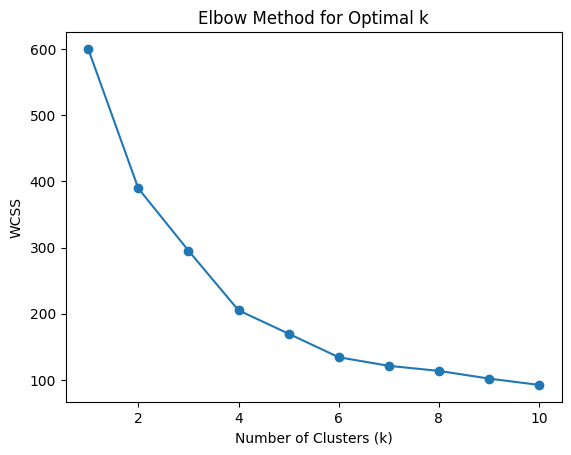

Silhouette Score for k=2: 0.335
Silhouette Score for k=3: 0.358
Silhouette Score for k=4: 0.404
Silhouette Score for k=5: 0.408
Silhouette Score for k=6: 0.431
Silhouette Score for k=7: 0.410


In [5]:
# Elbow Method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_features)
    wcss.append(km.inertia_)

# Plot Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

# Silhouette Scores
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Apply K-Means Clustering (choose best k, e.g. k=5)

In [6]:
# Final model
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add to original DataFrame
df['Cluster'] = clusters

PCA for 2D Visualization

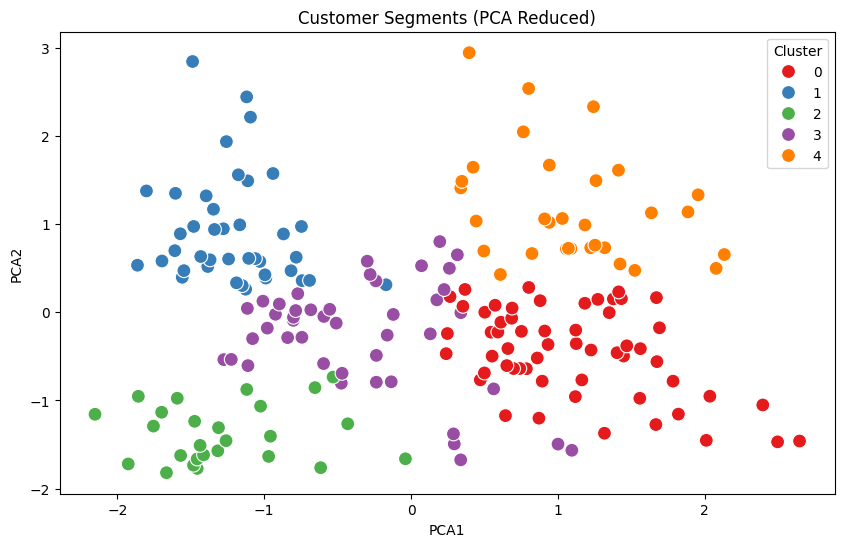

In [7]:
# Reduce dimensions
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

# Add PCA components
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segments (PCA Reduced)")
plt.show()

 Analyze Segments

          Age  Income  Score
Cluster                     
0        55.3    47.6   41.7
1        32.9    86.1   81.5
2        25.8    26.1   74.8
3        26.7    54.3   40.9
4        44.4    89.8   18.5


/tmp/ipython-input-8-639083742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set2')


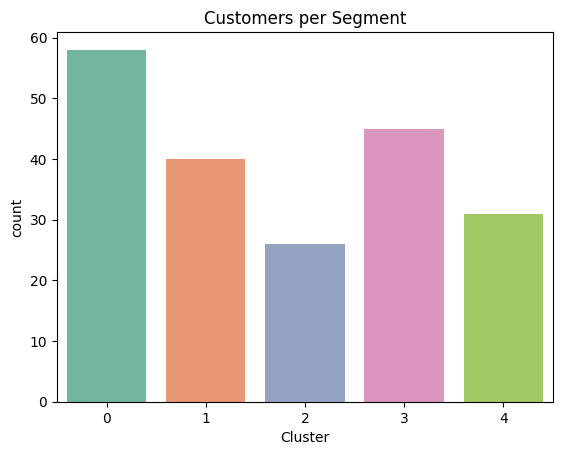

In [8]:
# Cluster profiling
cluster_summary = df.groupby('Cluster')[['Age', 'Income', 'Score']].mean().round(1)
print(cluster_summary)

# Count per cluster
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title("Customers per Segment")
plt.show()

Suggested Marketing Strategies

In [10]:
for idx, row in cluster_summary.iterrows():
    print(f"Segment {idx}:")
    if row['Income'] > 70 and row['Score'] > 60:
        print("High income & high spenders → Target for luxury promotions.\n")
    elif row['Income'] < 40 and row['Score'] > 60:
        print("Low income but loyal spenders → Offer loyalty rewards.\n")
    elif row['Income'] > 70 and row['Score'] < 40:
        print("High income but low spenders → Educate on premium offers.\n")
    elif row['Income'] < 40 and row['Score'] < 40:
        print("Low income & low spenders → Minimal focus or budget options.\n")
    else:
        print("Mixed behavior → Explore further personalization.\n")

Segment 0:
Mixed behavior → Explore further personalization.

Segment 1:
High income & high spenders → Target for luxury promotions.

Segment 2:
Low income but loyal spenders → Offer loyalty rewards.

Segment 3:
Mixed behavior → Explore further personalization.

Segment 4:
High income but low spenders → Educate on premium offers.

